# Data Science And Business Analyst Intern November Batch 2022

 Task 1 completed By : Daniyal Ali Israil

Task:1 PREDICT THE PERCENTAGE OF THE STUDENT ON THE BASIC OF STUDY HOURS.WHAT WILL BE THE PREDICTED SCORE IF STUDENT STUDY 9.25HRS/DAY (USING SIPERVISED ML)

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np
%matplotlib inline

In [3]:
data_url= 'https://raw.githubusercontent.com//AdiPersonalWorks//Random/master//student_scores%20-%20student_scores.csv'
data=pd.read_csv(data_url)

# DISPLAY TOP 5 ROWS OF THE DATA SET

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# DISPLAY LAST 5 ROWS OF THE DATA SET

In [5]:
data.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


# CHECK DATA TYPE OF EACH COLUMN

In [6]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

# CHECK NULL VALUES IN THE DATA SET

In [13]:
data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [14]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# CHECK THE SHAPE OF DATA TYPE

In [19]:
data.shape

(25, 2)

# SCATTER PLOT 

Text(0.5, 1.0, 'The Grpah show Hours ans Percentage score')

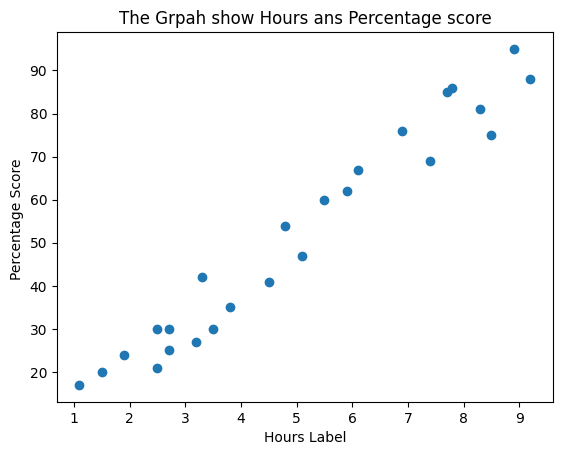

In [30]:
plt.scatter(data['Hours'],data['Scores'])
plt.xlabel('Hours Label')
plt.ylabel('Percentage Score ')
plt.title('The Grpah show Hours ans Percentage score')

FROM THE ABOVE GRAPH WE CAN SEE POSITIVE LINEAR RELATION SHIP BETWEEN THE DEPENDENT AND INDEPENDENT VARIABLE FOR EXAMPLE HOURS AND SCORES

In [7]:
x=data['Hours'].values.reshape(-1,1)
y=data['Scores'].values

# SPLITTING THE DATA


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)
print("splitting complete successfully")

splitting complete successfully


In [10]:
len(X_train),len(X_test),len(y_train),len(y_test)

(17, 8, 17, 8)

In [11]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.


In [12]:
print("Intercept: ",regressor.intercept_)
print("Slope coefficient: ",regressor.coef_)

Intercept:  2.4213083775758264
Slope coefficient:  [9.81206695]


# PLOTTING THE  REGRESSION LINE TO OBSERVE THE VALUES MACHINE HAS LEARNED 

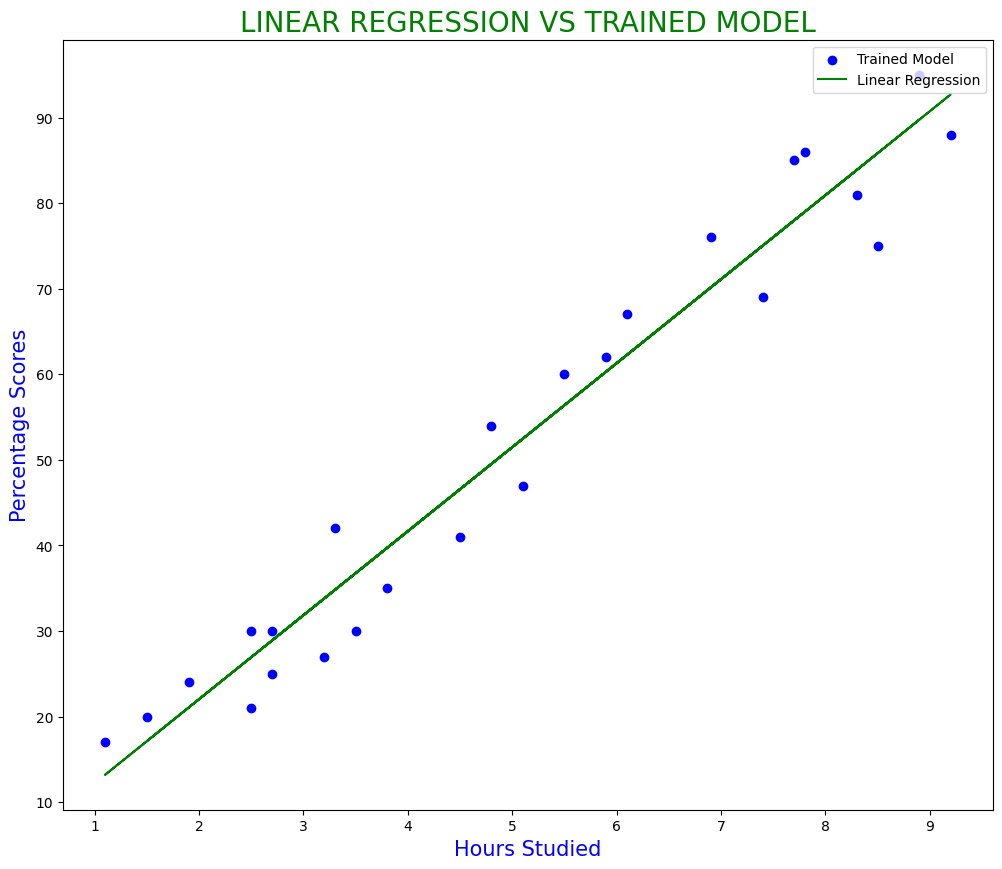

In [14]:
reg_line=regressor.coef_*x+regressor.intercept_
plt.figure(figsize=(12,10))
plt.title("LINEAR REGRESSION VS TRAINED MODEL",fontsize=20,color="green")
plt.scatter(x,y,label="Trained Model",color='blue')
plt.plot(x,reg_line,label="Linear Regression",color="green")
plt.xlabel("Hours Studied",color="Blue",fontsize=15)
plt.ylabel("Percentage Scores",color="blue",fontsize=15)
plt.legend(loc=1)
plt.show()

In [15]:
y_pred=regressor.predict(X_test)
y_pred

array([75.0306038 , 70.12457032, 46.57560965, 36.7635427 , 62.27491676,
       52.46284982, 34.80112931, 26.95147575])

In [16]:
data_pred=pd.DataFrame({"Actual Scores": y_test,"Predicted Scores":y_pred})
data_pred

,Actual Scores,Predicted Scores
0,69,75.030604
1,76,70.124570
2,41,46.575610
3,30,36.763543
4,67,62.274917
5,47,52.462850
6,42,34.801129
7,30,26.951476


<AxesSubplot:ylabel='Count'>

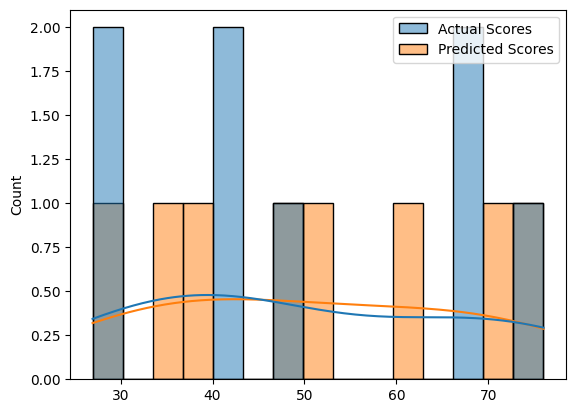

In [17]:
sns.histplot(data_pred,bins=15,kde=True)

In [18]:
regressor.score(X_test,y_test)

0.8854976232318078

In [23]:
from sklearn import metrics
#RMSE performs best for regression when outliers are rare
print("MAE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE 5.711919202893784


# HOURS AND PEDICTION SCORES

In [24]:
hours=([9.25,9.5,9.7,10,11])
hours=pd.DataFrame(hours)
new_pred=regressor.predict(hours)
new_pred=pd.DataFrame(new_pred)
data_new=pd.concat([hours,new_pred],axis=1,keys=['Hours','Predicted Scores'])
data_new

,Hours,Predicted Scores
,0,0
0,9.25,93.182928
1,9.50,95.635944
2,9.70,97.598358
3,10.00,100.541978
4,11.00,110.354045
